# 490 GeoSpatial Data Science Final: Whale Migration: Temperature Analysis
### Gage Doyle
#### 05/17/2024


In [13]:
import numpy as np
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
import netCDF4
import h5netcdf
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rioxarray as rio

In [42]:

# Define the directory containing the files
directory = "C:/Users/gaged/Desktop/SDS 490 Data/Final Project/migration/Temperature/Data/e4"

# Empty xarray dataset to store merged data
merged_1999 = None
merged_2008 = None

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):  # Check if the file is a netCDF file
        file_path = os.path.join(directory, filename)
        # Load dataset
        dataset = xr.open_dataset(file_path)
        # Extract the time period from the filename
        time_period = filename.split(".")[2]  # Assuming the filename format is "ersst.v4.yyyymm.nc"
        # Merge subsets sequentially for 1999
        if time_period.startswith("1999"):
            if merged_1999 is None:
                merged_1999 = dataset
            else:
                merged_1999 = xr.merge([merged_1999, dataset])
        # Merge subsets sequentially for 2008
        elif time_period.startswith("2008"):
            if merged_2008 is None:
                merged_2008 = dataset
            else:
                merged_2008 = xr.merge([merged_2008, dataset])

# Now you have merged datasets for 1999 and 2008 without using concat or combine_first


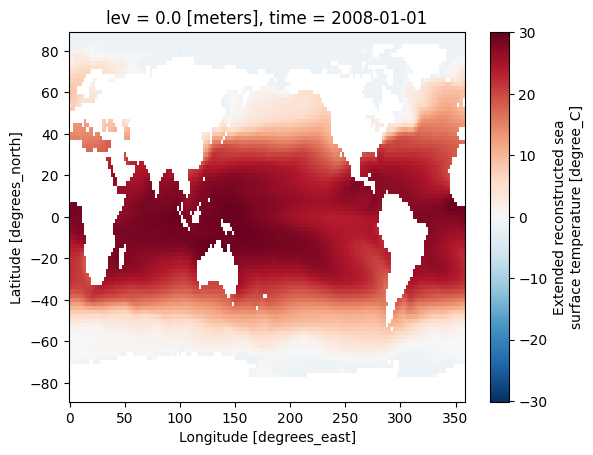

In [15]:
merged_2008.sst[0].plot()

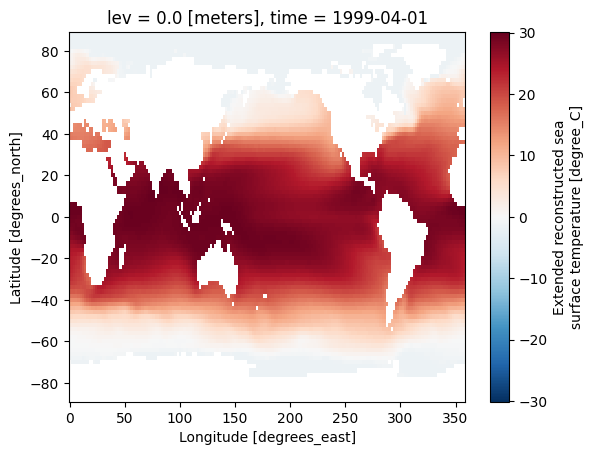

In [16]:
merged_1999.sst[0].plot()

In [38]:
# avg temp for each lat lon for all of '08
avg_sst_1999 = merged_1999.groupby("time.year").mean()

In [39]:
# avg temp for each lat lon for all of '99
avg_sst_2008 = merged_2008.groupby("time.year").mean()

In [40]:
# Reproject to Cal-Coast cord-sys from epsg.io
avg_sst_2008_proj = avg_sst_2008.rio.write_crs("EPSG:3310")

In [41]:
# Reproject to Cal-Coast cord-sys from epsg.io
avg_sst_1999_proj = avg_sst_1999.rio.write_crs("EPSG:3310")

In [48]:
#clipped extent
avg_sst_1999_proj = avg_sst_1999_proj.rio.clip_box(minx= 194.338, miny=4.606, maxx=305.638, maxy=53.148)
avg_sst_2008_proj = avg_sst_2008_proj.rio.clip_box(minx= 194.338, miny=4.606, maxx=305.638, maxy=53.148)

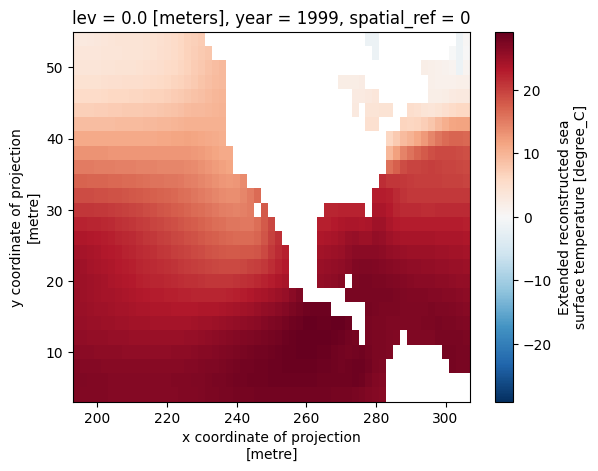

In [47]:
avg_sst_1999_proj.sst.plot()

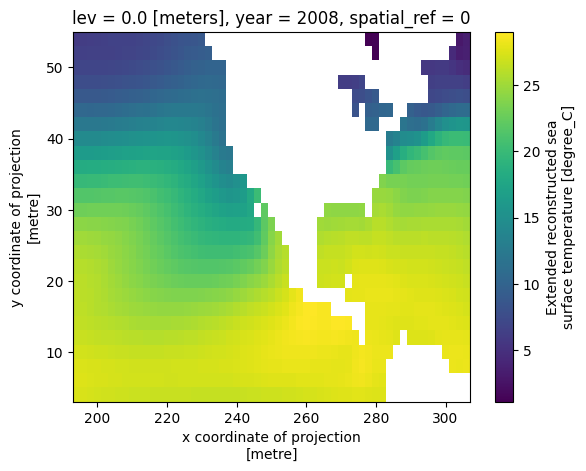

In [49]:
avg_sst_2008_proj.sst.plot()

In [29]:
# Calculate the percent change in temperature
percent_change = ((avg_sst_2008.sst - avg_sst_1999.sst) / avg_sst_1999.sst) * 100

TypeError: No numeric data to plot.